In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [2]:
'''
reading from google drive dataset
'''
anyoneWithLink='https://drive.google.com/file/d/1u0FVgsWtGPcHpnBlbfL1LBX0Vmhbiu-x/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+anyoneWithLink.split('/')[-2]

housingDf=pd.read_csv(path)

In [3]:
housingDf.shape

(10692, 13)

In [4]:
housingDf.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# Missing value checking

In [5]:
housingDf.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

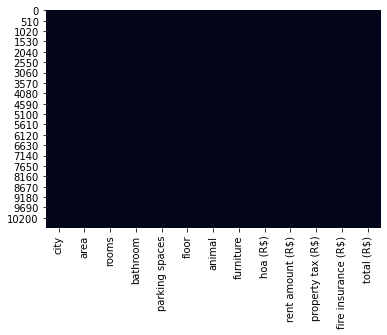

In [6]:
sns.heatmap(housingDf.isnull(),cbar=False)

# Data Exploration and Feature Engineering

In [7]:
housingDf.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [8]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Converting to Numerical Value

In [9]:
'''
 converting to numerical value 
'''
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
housingDf['animal']= np.where(housingDf['animal']=='acept',1,0)
housingDf['furniture']=np.where(housingDf['furniture']=='furnished',1,0)
housingDf['city']=le.fit_transform(housingDf['city'])

In [10]:
'''
floor contains - which should be 0
'''
for i in housingDf.select_dtypes('object'):
    print(i,housingDf[i].unique())

floor ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']


In [11]:
housingDf['floor'] = housingDf['floor'].apply(lambda x: 0 if x == '-' else x).astype(int) 

In [12]:
'''
We can comine furniture and animal as unique inclusions 
'''
housingDf['unique_inclusions_cnt'] = housingDf['furniture']+housingDf['animal']

In [13]:
'''
 Dropping as unique_inclusions_cnt=comb(furniture,animal)
'''
housingDf.drop(['furniture','animal'],axis=1,inplace=True)

In [14]:
housingDf.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),unique_inclusions_cnt
0,4,70,2,1,1,7,2065,3300,211,42,5618,2
1,4,320,4,4,0,20,1200,4960,1750,63,7973,1
2,2,80,1,1,1,6,1000,2800,0,41,3841,1
3,2,51,2,1,0,2,270,1112,22,17,1421,1
4,4,25,1,1,0,1,0,800,25,11,836,0


## Correlation between variables




In [15]:
# sns.pairplot(housingDf)

In [16]:
housingDf.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)         1.000000
fire insurance (R$)      0.987343
bathroom                 0.668504
parking spaces           0.578361
rooms                    0.541758
total (R$)               0.264490
city                     0.188571
area                     0.180742
unique_inclusions_cnt    0.172893
property tax (R$)        0.107884
floor                    0.073596
hoa (R$)                 0.036490
Name: rent amount (R$), dtype: float64

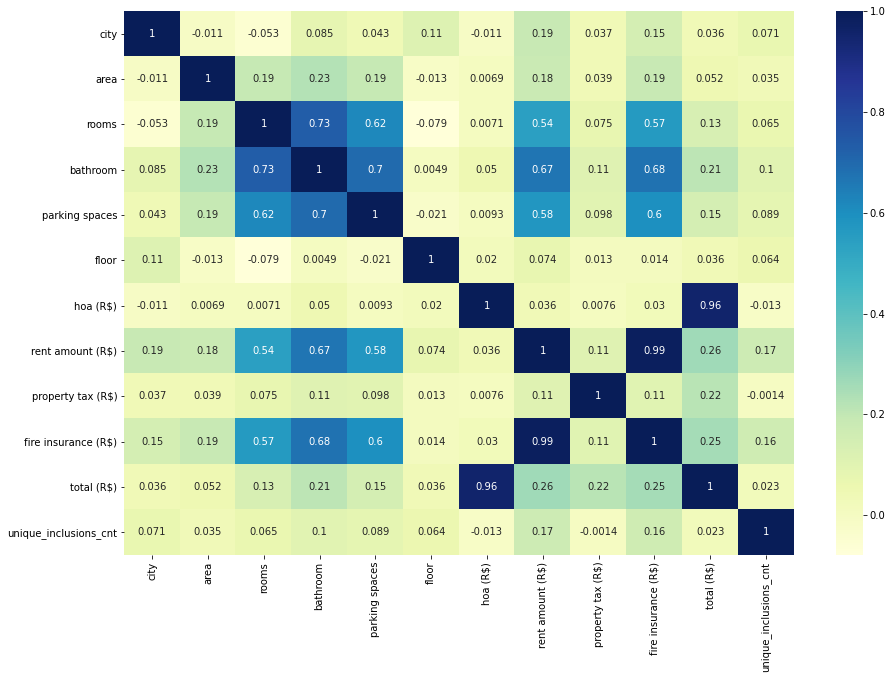

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(housingDf.corr(),annot=True,cmap="YlGnBu")

In [18]:
# Dropping beacause these features don't have any sigficant relationship (<< 0.1 ) with target 

housingDf.drop(['floor','hoa (R$)'],axis=1,inplace=True)

In [19]:
''' 
Correlation with our target variables
'''
housingDf.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)         1.000000
fire insurance (R$)      0.987343
bathroom                 0.668504
parking spaces           0.578361
rooms                    0.541758
total (R$)               0.264490
city                     0.188571
area                     0.180742
unique_inclusions_cnt    0.172893
property tax (R$)        0.107884
Name: rent amount (R$), dtype: float64

# Multicollinearity
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

**Important Assumption for Linear regression**

*  The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

Here is an example of problems created by this 

**Case 1:**

Considering the Variables X1 and X2, they are independent of every other variable. If we try to change the magnitude of the either X1 or X2 , they will not cause any other independent variable to change its value or by some negligible amount. As a result we can clearly observe the influence of independent Variable X over Y.

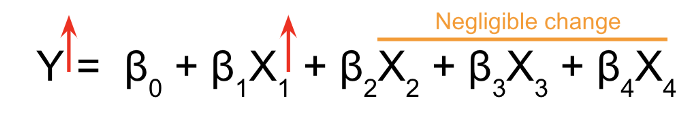

**Case 2:**

In case of variables X3 and X4, they are significantly correlated. Can you guess what will happen if we apply the same procedure as Case 1?
Image Below illustrates exactly the same.

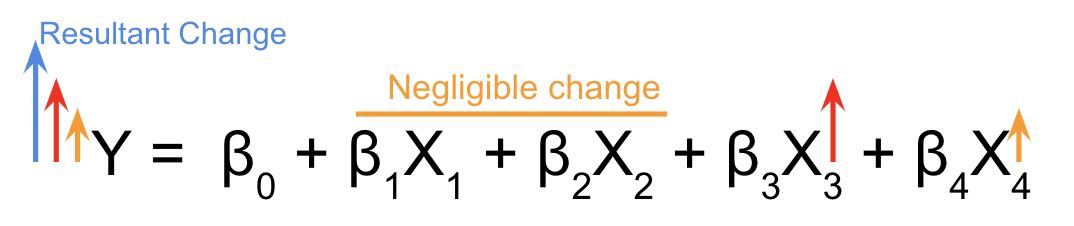

# Detecting Multicollinearity
*  Correlation Matrix
*  VIF (Variable Inflation Factors)

**VIF**

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.VIF score of an independent variable represents how well the variable is explained by other independent variables.

*   VIF starts at 1 and has no upper limit
*   VIF = 1, no correlation between the independent variable and the other variables
*   VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
# dropping target variable keeping only independant variable
copyDf=housingDf.drop(['rent amount (R$)'],axis=1)
X = copyDf
calc_vif(X)

,variables,VIF
0,city,3.602415
1,area,1.142046
2,rooms,9.618703
3,bathroom,11.289817
4,parking spaces,4.302275
5,property tax (R$),1.071326
6,fire insurance (R$),4.613048
7,total (R$),1.242612
8,unique_inclusions_cnt,3.506388


In [22]:
'''
 dropping target variable keeping only independant variable
'''
copyDf1=housingDf.drop(['rent amount (R$)','bathroom'],axis=1)
X = copyDf1
calc_vif(X)


,variables,VIF
0,city,3.547407
1,area,1.135211
2,rooms,6.598062
3,parking spaces,3.809829
4,property tax (R$),1.070871
5,fire insurance (R$),4.159106
6,total (R$),1.236568
7,unique_inclusions_cnt,3.506326


In [23]:
# dropping target variable keeping only independant variable
copyDf2=housingDf.drop(['rent amount (R$)','bathroom','rooms'],axis=1)
X = copyDf2
calc_vif(X)


,variables,VIF
0,city,3.196322
1,area,1.129661
2,parking spaces,3.087189
3,property tax (R$),1.070814
4,fire insurance (R$),3.829284
5,total (R$),1.236465
6,unique_inclusions_cnt,3.130596


In [24]:
# Dropping to remove multicoliearity
 
housingDf.drop(['bathroom','rooms'],axis=1,inplace=True)

In [25]:
housingDf.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)         1.000000
fire insurance (R$)      0.987343
parking spaces           0.578361
total (R$)               0.264490
city                     0.188571
area                     0.180742
unique_inclusions_cnt    0.172893
property tax (R$)        0.107884
Name: rent amount (R$), dtype: float64

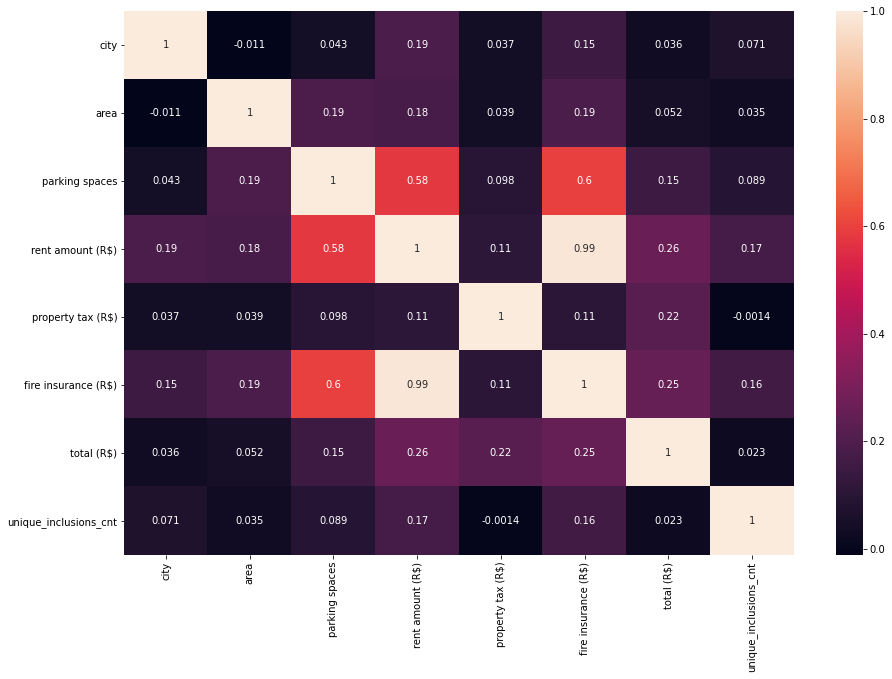

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(housingDf.corr(),annot=True)

# Test Train Split

In [27]:
from sklearn.model_selection import train_test_split,cross_validate

X = housingDf.drop(columns=['rent amount (R$)'])
y = housingDf['rent amount (R$)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Linear Multiple Regression 

In [28]:
from sklearn.linear_model import LinearRegression
lrModel=LinearRegression().fit(X_train,y_train)
test_preds=lrModel.predict(X_test)
train_preds=lrModel.predict(X_train)

Text(0, 0.5, 'Predicted values')

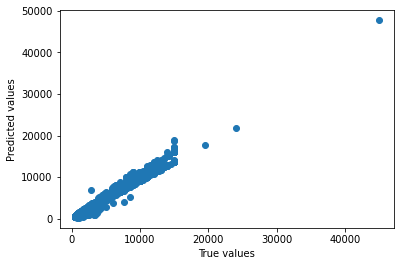

In [29]:
plt.scatter(y_test,test_preds)
plt.xlabel('True values')
plt.ylabel('Predicted values')

In [30]:
'''
got ->
Train Score : 0.9760444692817276
Test Score : 0.9789268071075765
'''
from sklearn.metrics import  r2_score
print("Train Score :",r2_score(y_train,train_preds))
print("Test Score :",r2_score(y_test,test_preds))

Train Score : 0.9762391644220468
Test Score : 0.9787066553377485
